In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read files

transactions = pd.read_pickle('transactions_cleaned.pkl')
customers = pd.read_pickle('customers_cleaned.pkl')
articles = pd.read_csv('data/articles.csv.zip')

In [4]:
# filter relevant customers
customers = customers[(customers['age'] >= 35) & (customers['age'] <= 44)]


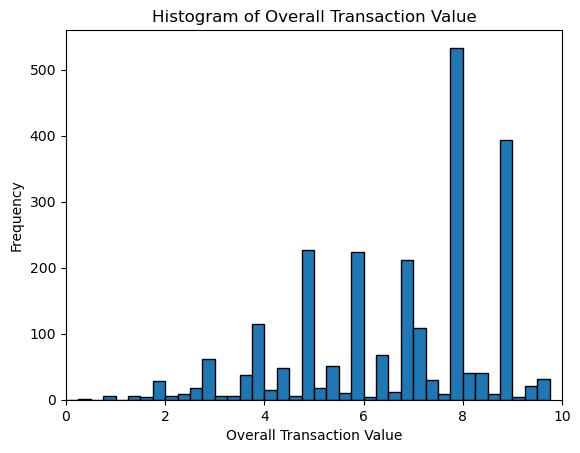

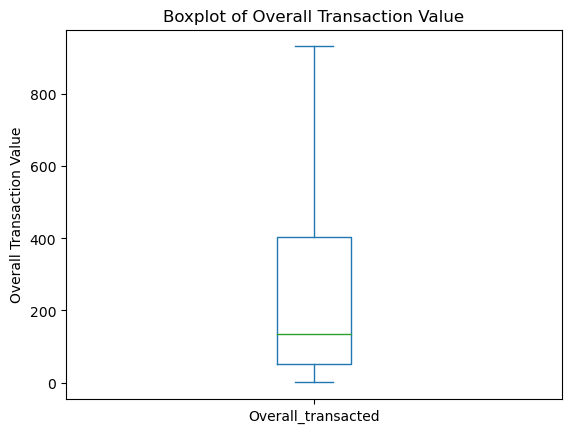

In [8]:
# seems like there's some masking of the transaction value. value spent is <5 for close to all cases. 
import numpy as np

bins = np.arange(0, 10, 0.25)
customers['Overall_transacted'].plot(kind='hist', edgecolor='black', bins = bins)
plt.xlabel('Overall Transaction Value')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Transaction Value')
plt.xlim(0, 10)
plt.show()

customers['Overall_transacted'].plot(kind='box', showfliers = False)
plt.ylabel('Overall Transaction Value')
plt.title('Boxplot of Overall Transaction Value')
plt.show()


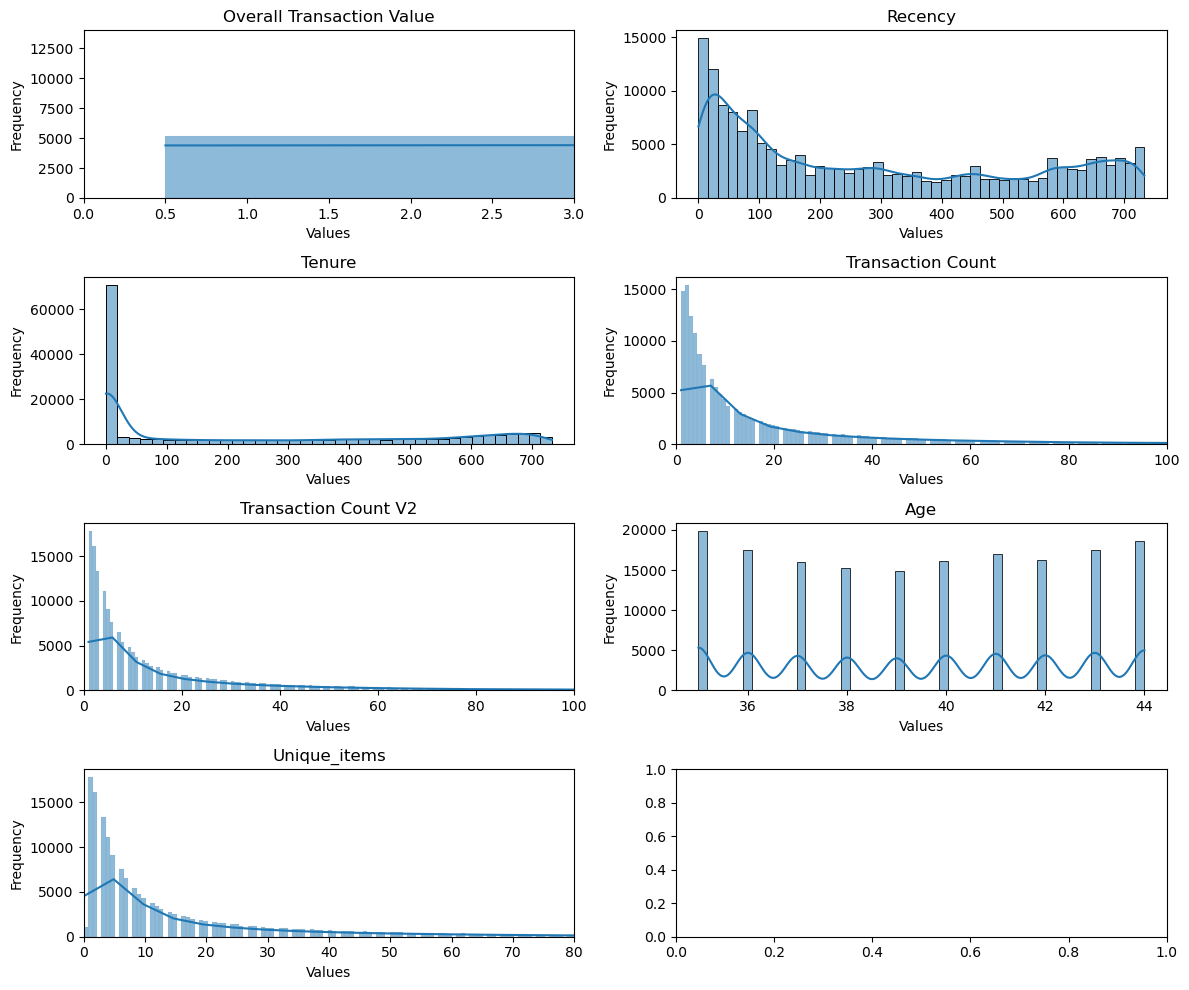

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 10))

# Plot distribution 1
sns.histplot(data= customers, x='Overall_transacted', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Overall Transaction Value')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(0, 3)

# Plot distribution 2
sns.histplot(data= customers, x='Recency_days', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Recency')
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
# axes[0, 1].set_xlim(0, 13)

# Plot distribution 3
sns.histplot(data= customers, x='Tenure_days', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Tenure')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
# axes[1, 0].set_xlim(0, 20)

# Plot distribution 4
sns.histplot(data= customers, x='Overall_transaction_count', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Transaction Count')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, 100)

# Plot distribution 5
sns.histplot(data= customers, x='Transaction_count_revised', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Transaction Count V2')
axes[2, 0].set_xlabel('Values')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xlim(0, 100)

# Plot distribution 6
sns.histplot(data= customers, x='age', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Age')
axes[2, 1].set_xlabel('Values')
axes[2, 1].set_ylabel('Frequency')
# axes[1, 1].set_xlim(0, 400)

# Plot distribution 7
sns.histplot(data= customers, x='Unique_items', kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Unique_items')
axes[3, 0].set_xlabel('Values')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_xlim(0, 80)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

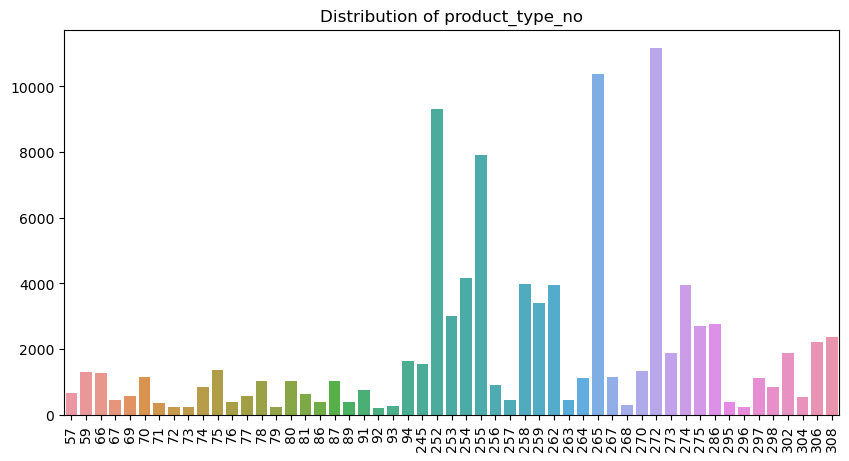

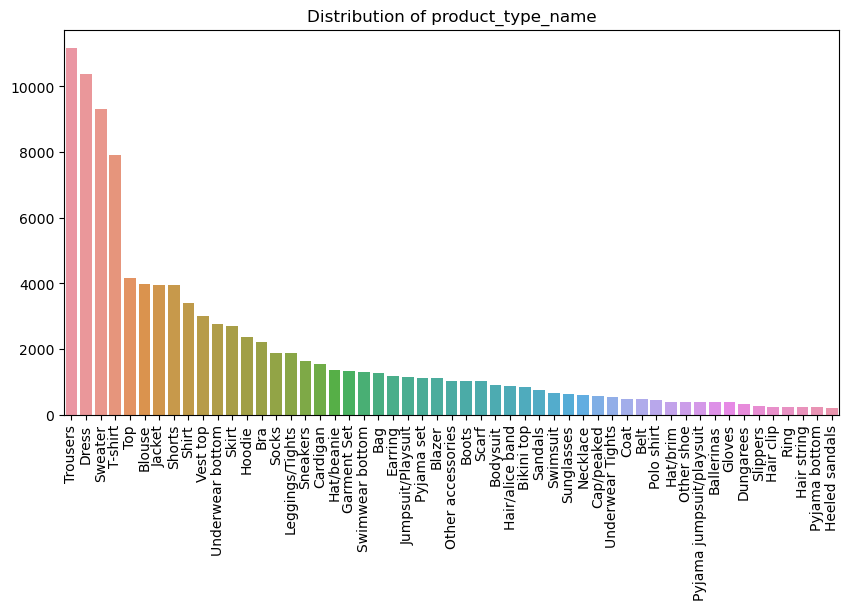

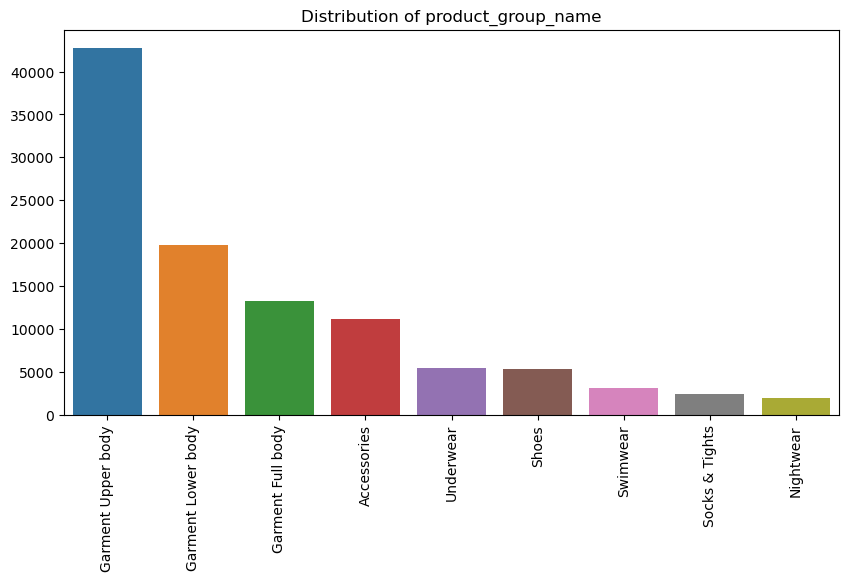

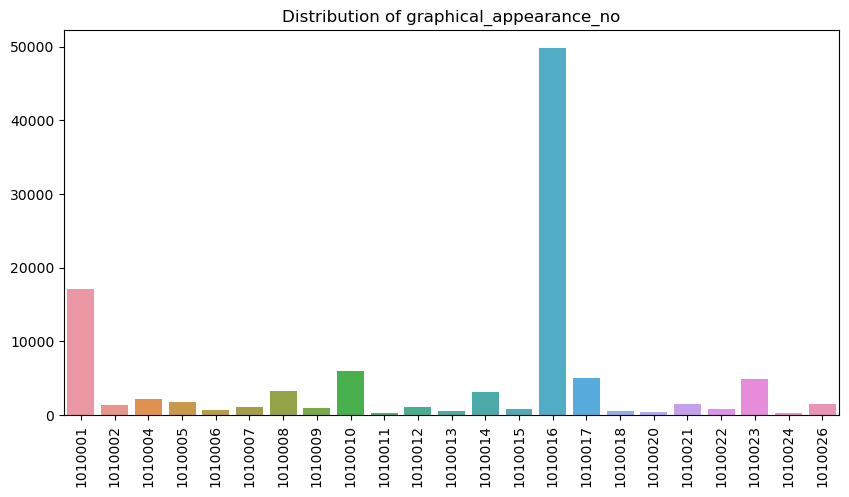

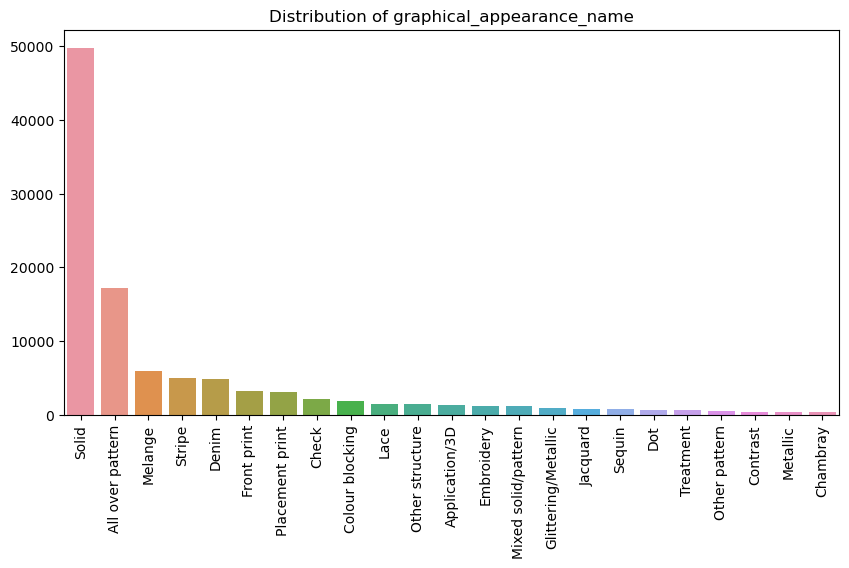

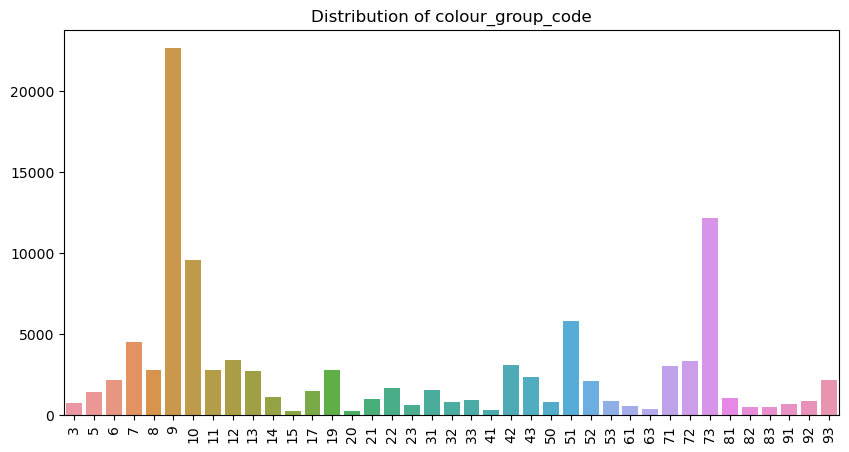

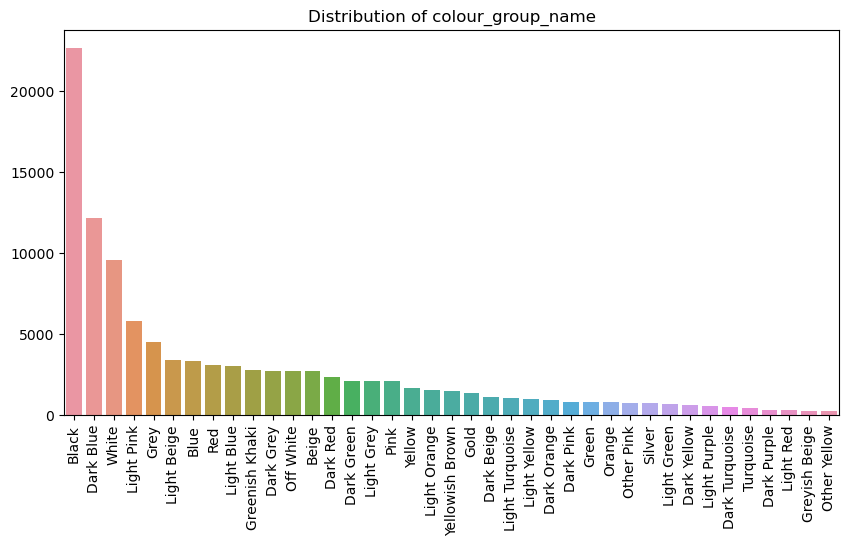

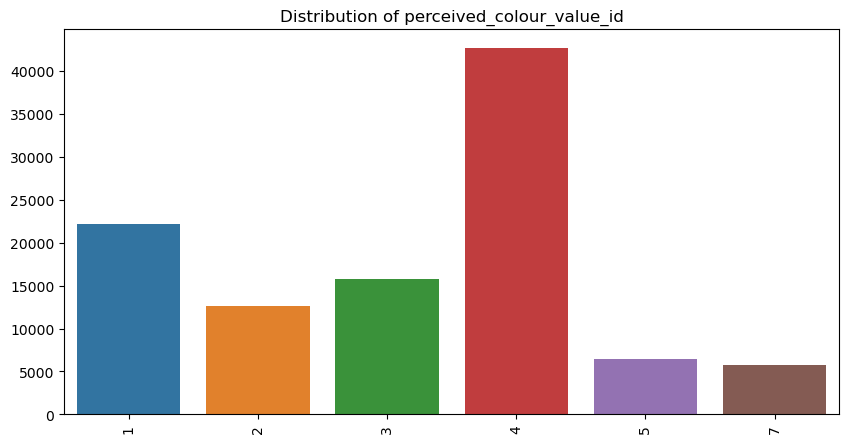

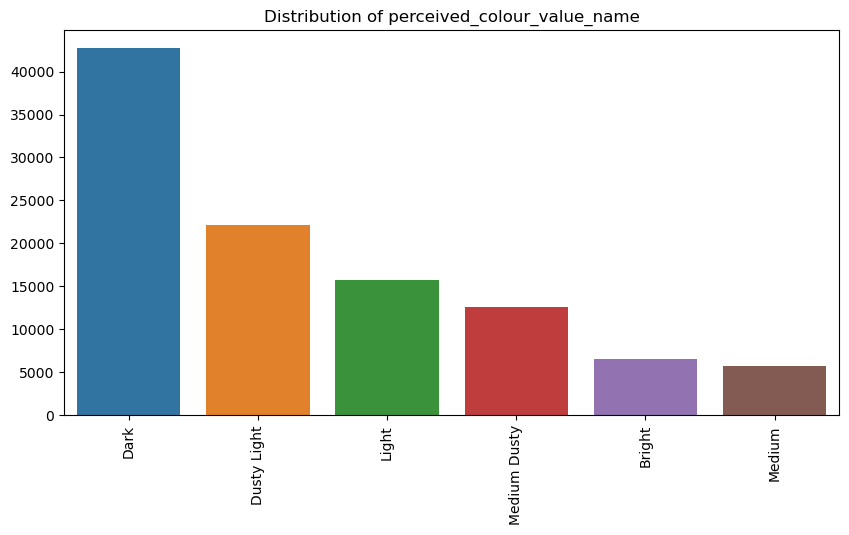

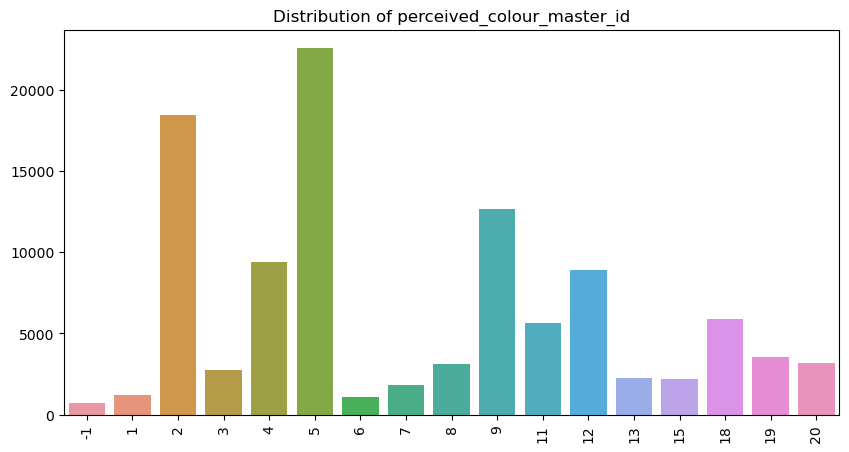

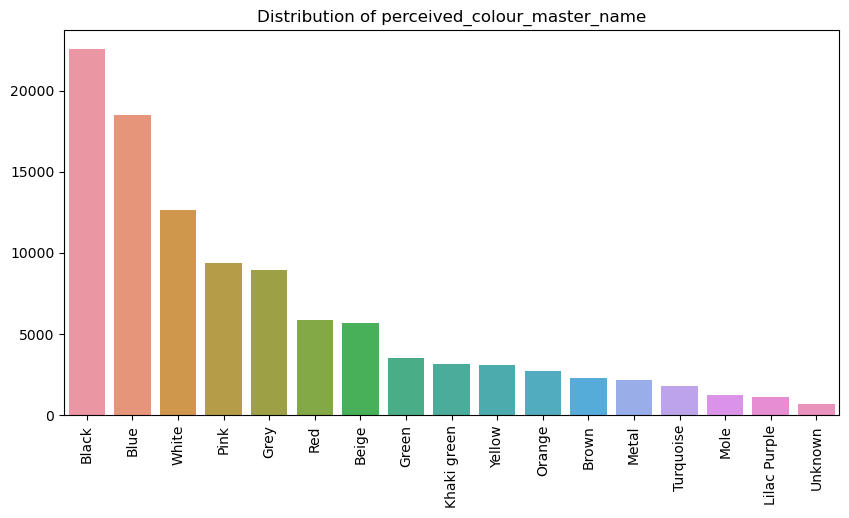

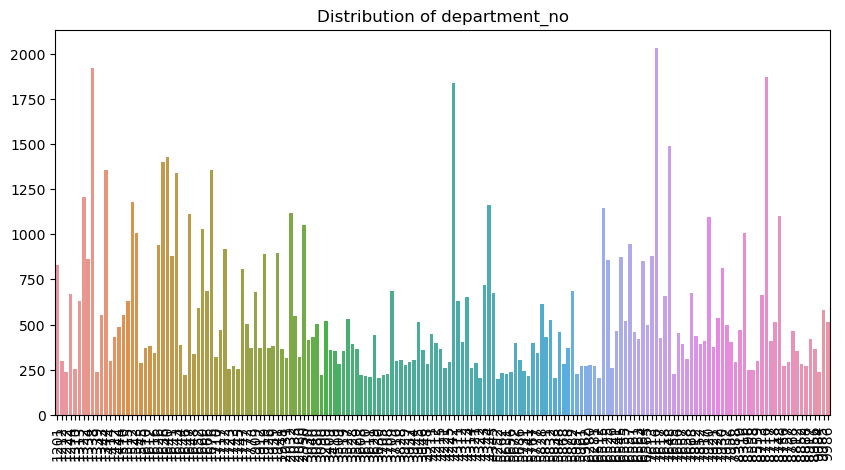

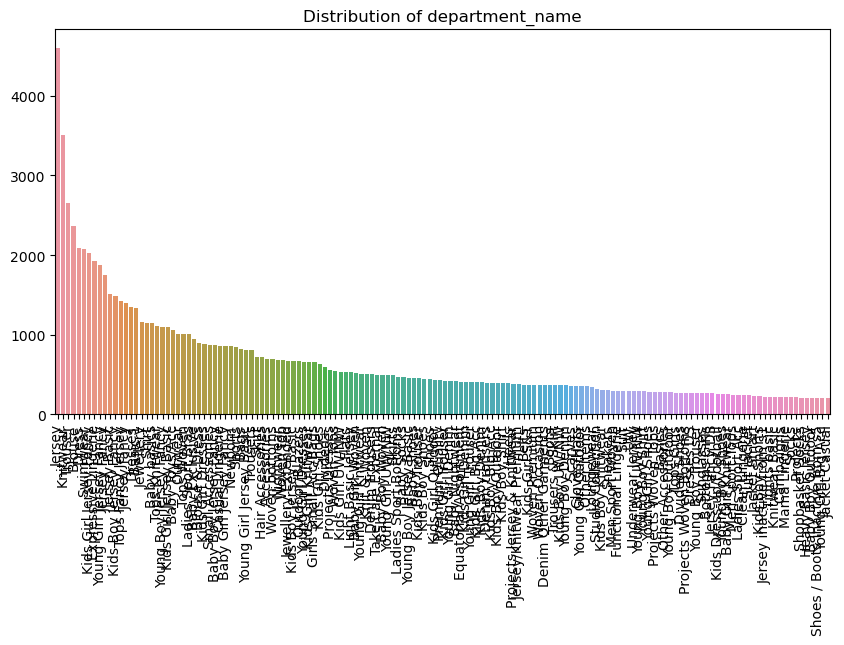

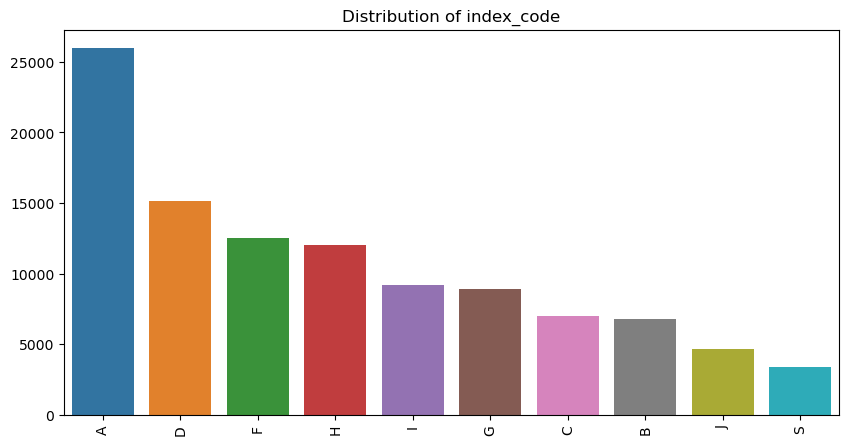

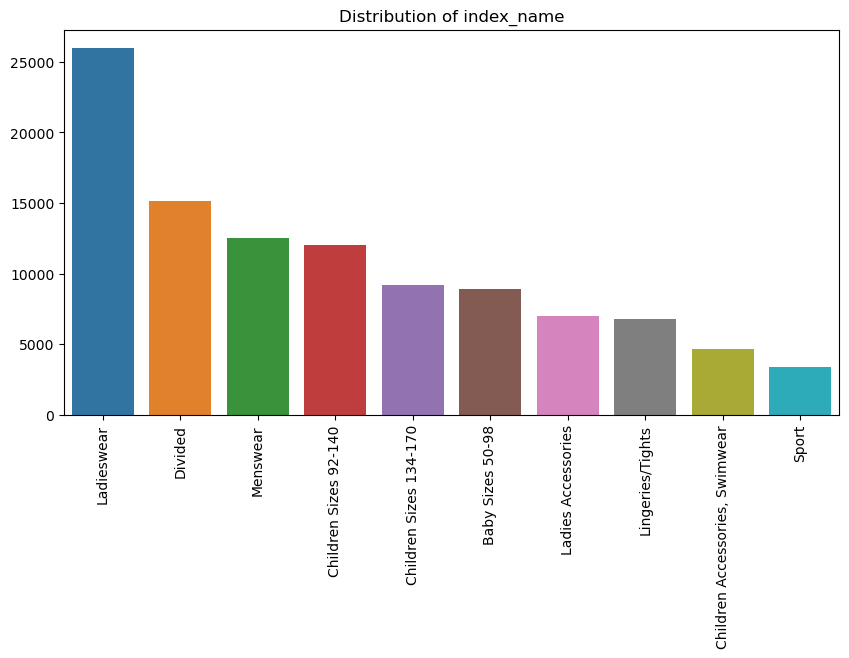

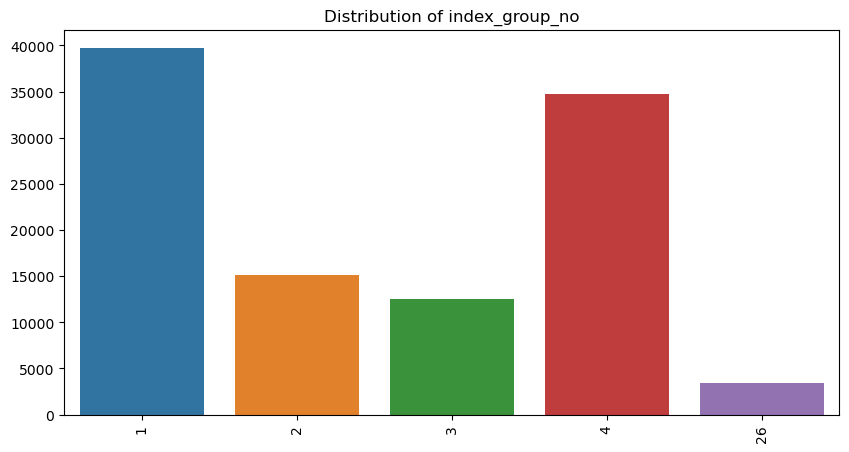

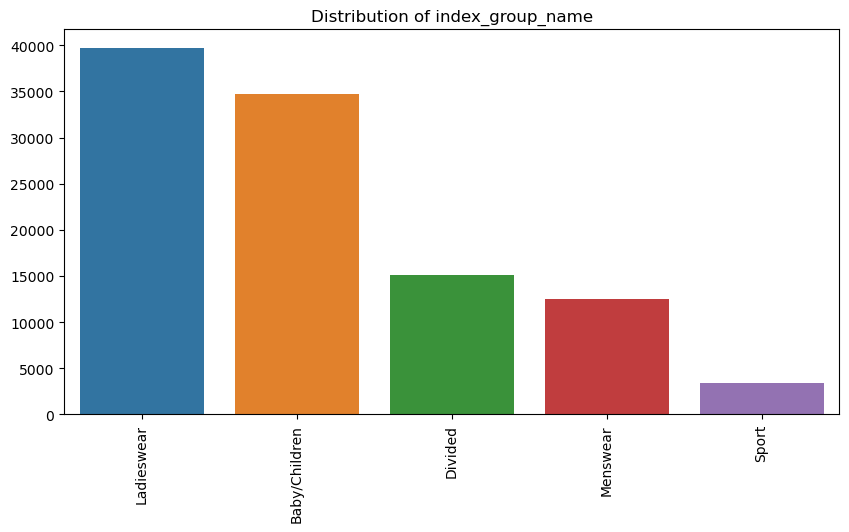

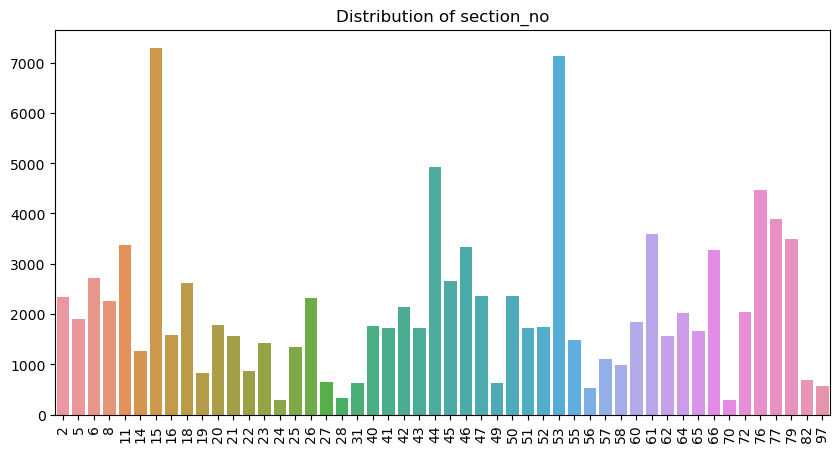

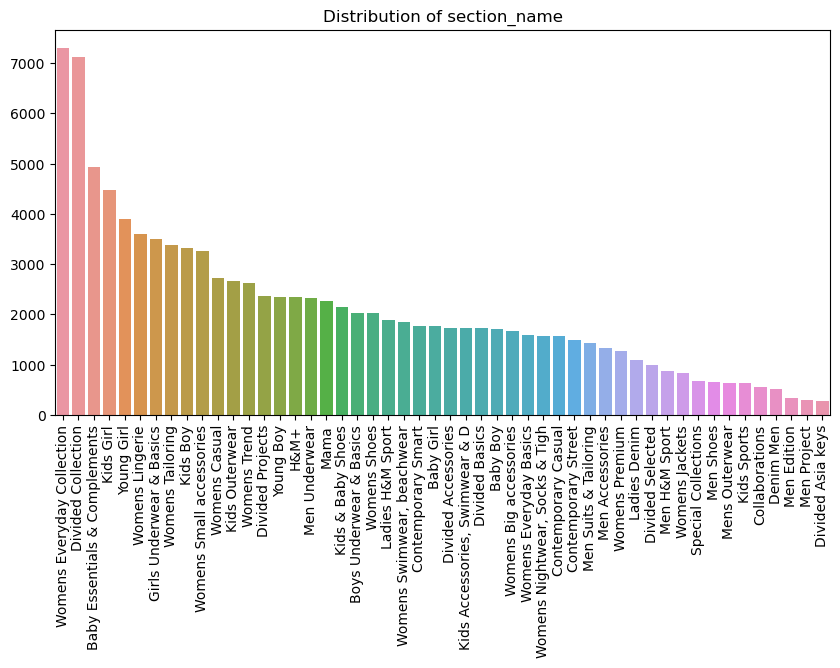

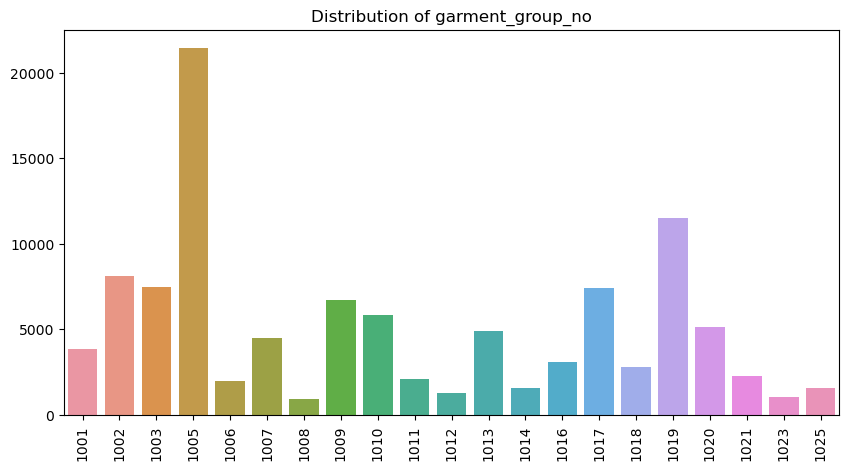

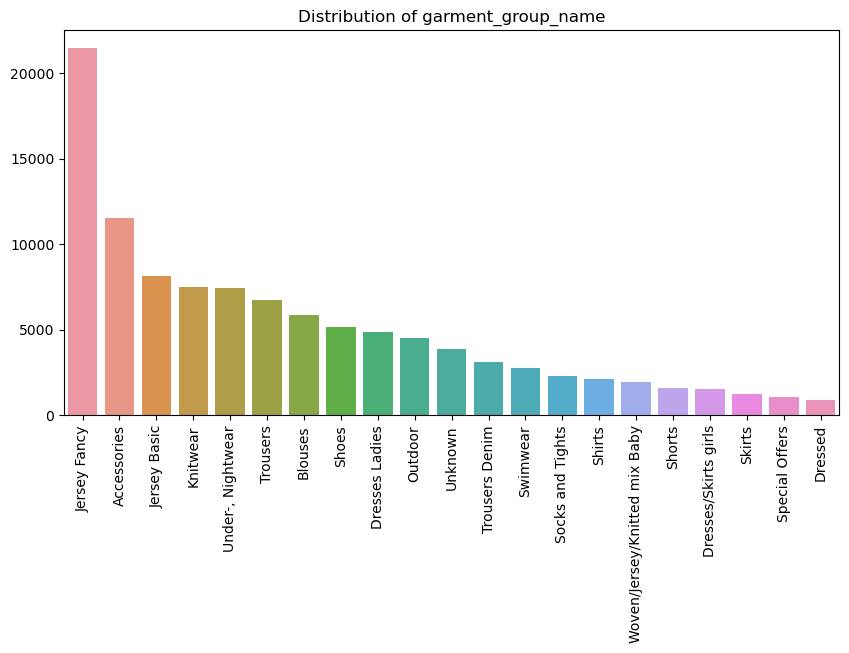

In [11]:
# Distribution of product types
columns_to_plot = articles.columns

for col in columns_to_plot:
    counts = articles[col].value_counts()
    counts = counts[counts > 200]  # Only keep counts of categories that are more than 100

    if len(counts) > 0:
        plt.figure(figsize=(10,5))
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()

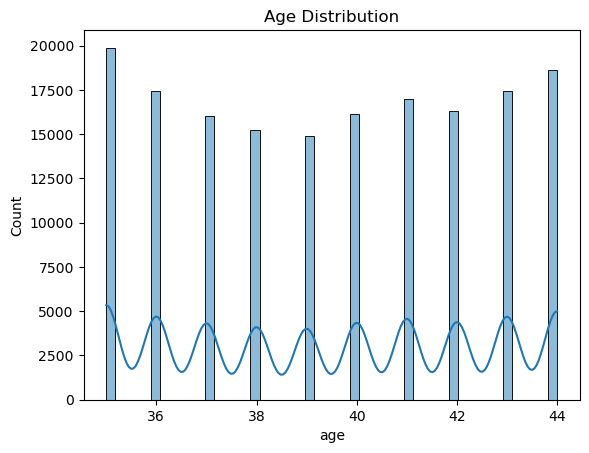

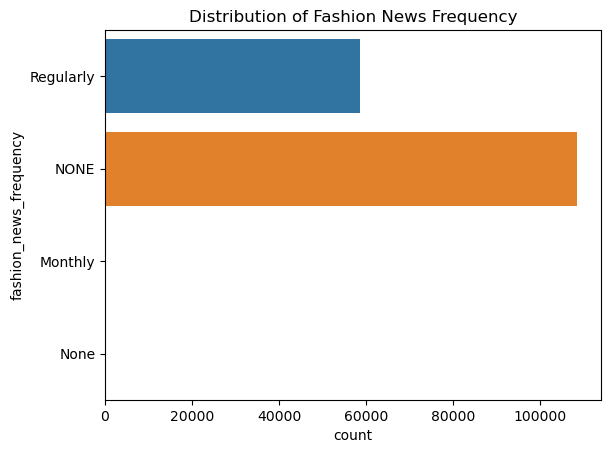

In [12]:
# Age distribution
sns.histplot(customers['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of fashion news frequency
sns.countplot(y='fashion_news_frequency', data=customers)
plt.title('Distribution of Fashion News Frequency')
plt.show()

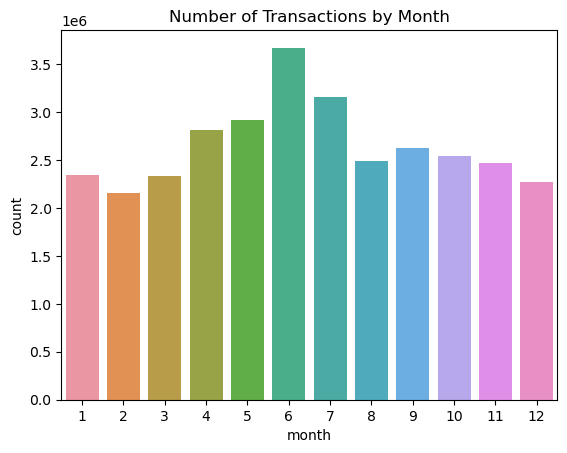

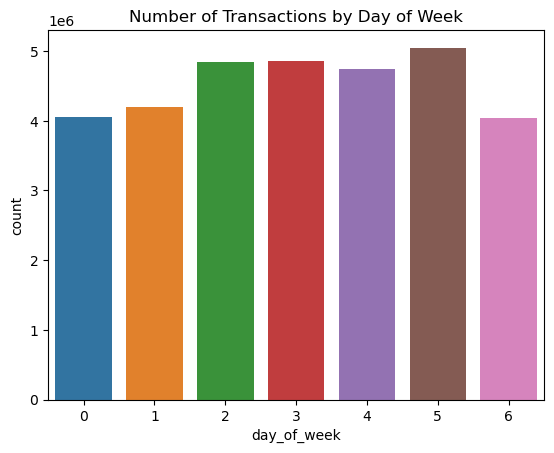

In [14]:
# Monthly Transactions
sns.countplot(x='month', data=transactions)
plt.title('Number of Transactions by Month')
plt.show()

# Transactions by Day of Week
sns.countplot(x='day_of_week', data=transactions)
plt.title('Number of Transactions by Day of Week')
plt.show()

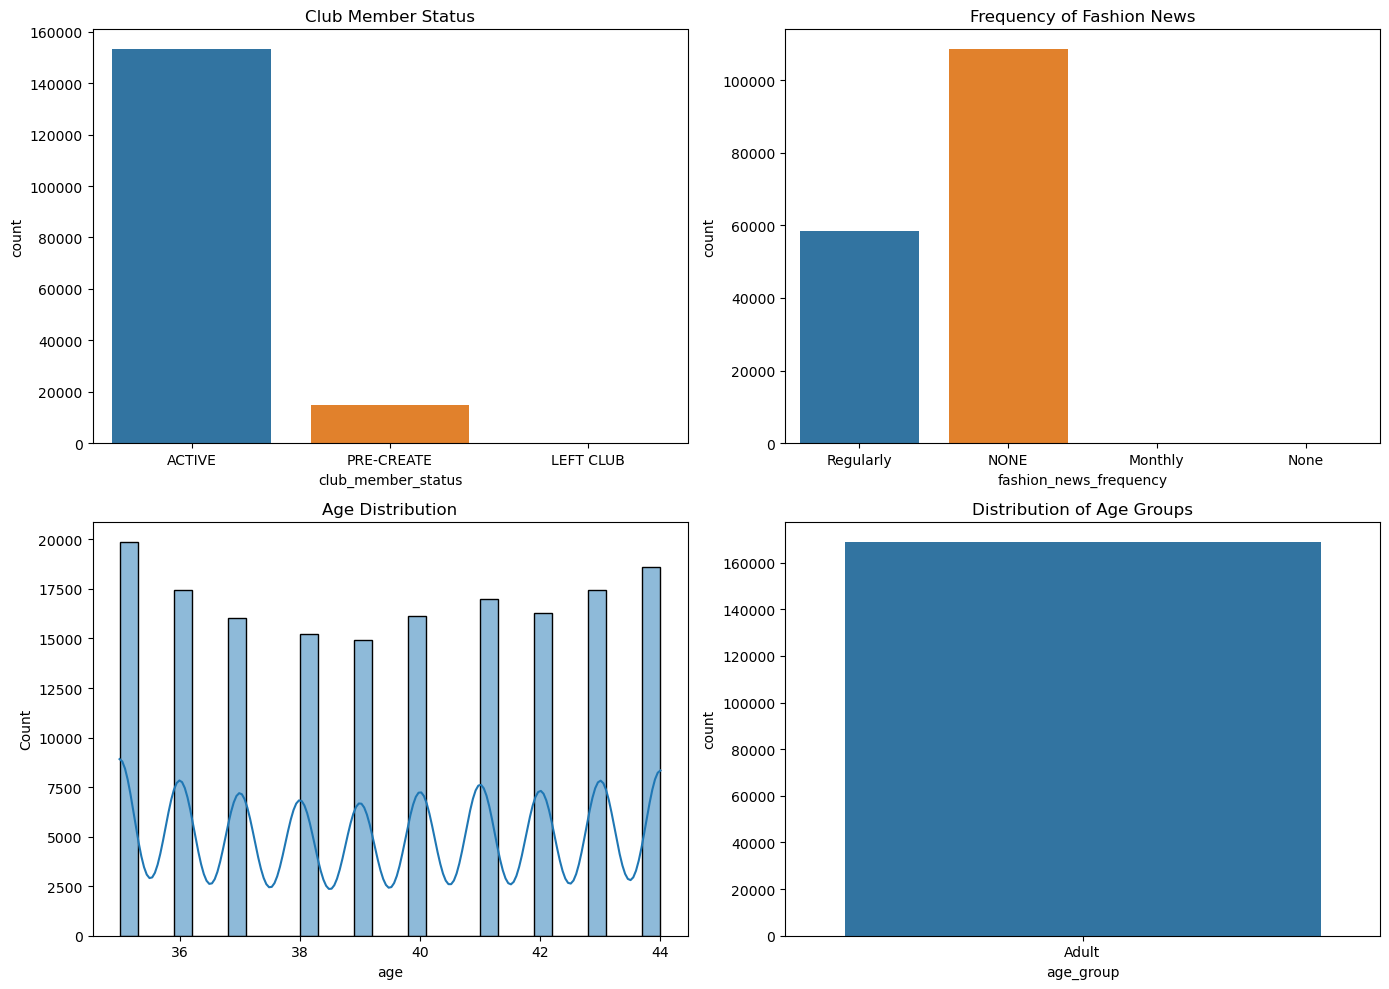

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(14,10))

# Club Member Status
sns.countplot(ax=ax[0,0], x='club_member_status', data=customers)
ax[0,0].set_title('Club Member Status')

# Fashion News Frequency
sns.countplot(ax=ax[0,1], x='fashion_news_frequency', data=customers)
ax[0,1].set_title('Frequency of Fashion News')

# Age Distribution
sns.histplot(ax=ax[1,0], x='age', data=customers, kde=True, bins=30)
ax[1,0].set_title('Age Distribution')

# Age Group
sns.countplot(ax=ax[1,1], x='age_group', data=customers)
ax[1,1].set_title('Distribution of Age Groups')

plt.tight_layout()
plt.show()
